In [42]:
import numpy as np 
import pandas as pd

In [43]:
df = pd.read_csv("csgo_round_snapshots.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [45]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [46]:
df.duplicated().sum()

4962

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

In [49]:
df.isna().sum().sum()

0

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  

In [51]:
for col in df.columns:
    if (df[col].dtype == "object")|(df[col].dtype == "bool"):
        df[col] = le.fit_transform(df[col])

In [52]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [53]:
x=df.iloc[:,:-1]
y=df["round_winner"]

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_std = sc.fit_transform(x)

In [55]:
x_std

array([[ 1.50968479, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       [ 1.15326858, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       [ 0.02596377, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       ...,
       [ 0.38106478,  0.88093134,  1.69091536, ...,  2.16182079,
        -0.16321956, -0.15480545],
       [ 0.00529651,  0.88093134,  1.69091536, ...,  1.56360029,
        -0.16321956, -0.15480545],
       [-0.37047176,  0.88093134,  1.69091536, ...,  0.9653798 ,
        -0.16321956, -0.15480545]])

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.3,random_state=45)

In [57]:
x_train

array([[-1.27438234,  1.50564126,  1.07010927, ..., -0.82928168,
        -0.16321956, -0.15480545],
       [ 0.00510863,  0.25622142,  0.24236781, ..., -0.82928168,
        -0.16321956, -0.15480545],
       [-0.63444897,  1.08916798,  1.07010927, ...,  0.9653798 ,
        -0.16321956, -0.15480545],
       ...,
       [ 0.38050113,  1.08916798,  1.48397999, ...,  2.16182079,
        -0.16321956, -0.15480545],
       [ 0.38144055, -0.78496178, -0.58537364, ...,  2.16182079,
        -0.16321956, -0.15480545],
       [-1.20843501, -1.4096717 , -0.58537364, ..., -0.82928168,
        -0.16321956, -0.15480545]])

In [58]:
x_test

array([[ 0.28674695,  4.21271758,  3.55333363, ...,  2.16182079,
        -0.16321956, -0.15480545],
       [ 0.28749848,  1.7138779 ,  1.69091536, ...,  2.16182079,
        -0.16321956, -0.15480545],
       [-0.66808023, -0.16025186,  0.44930318, ..., -0.82928168,
        -0.16321956, -0.15480545],
       ...,
       [-1.2215869 ,  1.7138779 ,  0.8631739 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       [-1.22722342,  0.04798478,  0.24236781, ..., -0.82928168,
        -0.16321956, -0.15480545],
       [-1.30519534, -0.99319842, -0.79230901, ..., -0.82928168,
        -0.16321956, -0.15480545]])

In [59]:
y_train

61981     1
101979    0
62198     0
5170      0
91049     0
         ..
13302     1
62900     1
6205      1
65126     1
6774      1
Name: round_winner, Length: 82213, dtype: int32

In [60]:
y_test

54935     1
67736     1
68431     0
3531      0
50330     1
         ..
10451     0
92707     0
96239     1
117609    1
118221    0
Name: round_winner, Length: 35235, dtype: int32

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
lda = LinearDiscriminantAnalysis()

In [63]:
lda.fit_transform(x_train,y_train)
lda.transform(x_test)

array([[-0.16951967],
       [-0.19927305],
       [ 0.00301013],
       ...,
       [ 1.07771186],
       [ 0.5107569 ],
       [ 0.26943998]])

In [64]:
lda.coef_.shape

(1, 96)

In [65]:
lda.coef_

array([[ 1.28511070e-01, -1.14741256e-02, -2.50352306e-03,
        -8.49369291e-02,  2.42015535e-01, -4.66067784e-01,
         3.29747390e-01, -5.96554182e-01,  6.18952175e-01,
        -2.10894840e-01,  1.77243643e-01,  1.84481317e-02,
         1.29484115e-01, -3.89648661e-02, -1.22405303e-01,
         4.59025223e-01, -1.82569605e-01,  5.81583410e-01,
        -1.96022441e-01,  3.59485657e-02, -3.02061246e-01,
         2.46218382e-01,  6.18033715e-09, -2.42861326e-03,
        -2.69020153e-03, -2.57476212e-02, -3.91978323e-03,
         1.32625867e-02, -1.34211486e-01,  4.69407511e-02,
         6.10058771e-09,  1.85197659e-02, -5.05138935e-02,
         1.19847333e-01,  2.01729988e-02, -2.65586007e-01,
        -5.21529509e+20, -7.04645267e-10, -9.56811830e-02,
         4.72009067e-02, -4.57551267e-01,  1.04961741e-01,
        -1.20914431e-02,  1.05121044e-01, -9.28035397e-03,
         7.19618676e-03, -1.65791876e-02,  3.89116338e-02,
         2.10552061e-02, -4.92018166e-03, -1.20337821e-0

In [76]:
lda_coeff = np.exp(np.abs(lda.coef_))
lda_coeff

C:\Users\welcome\AppData\Local\Temp\ipykernel_10012\1465294781.py:1: RuntimeWarning: overflow encountered in exp
  lda_coeff = np.exp(np.abs(lda.coef_))


array([[1.13713401, 1.01154021, 1.00250666, 1.0886484 , 1.27381398,
        1.59371502, 1.3906168 , 1.81585092, 1.85698123, 1.2347825 ,
        1.19392195, 1.01861935, 1.13824103, 1.03973395, 1.13021209,
        1.58253062, 1.20029769, 1.7888687 , 1.21655421, 1.03660253,
        1.35264407, 1.27917889, 1.00000001, 1.00243156, 1.00269382,
        1.02608195, 1.00392748, 1.01335092, 1.14363466, 1.04805991,
        1.00000001, 1.01869232, 1.05181148, 1.12732473, 1.02037785,
        1.30419502,        inf, 1.        , 1.10040818, 1.0483326 ,
        1.58019976, 1.11066812, 1.01216484, 1.11084506, 1.00932355,
        1.00722214, 1.01671739, 1.03967861, 1.02127843, 1.00493231,
        1.12787781, 1.03440283, 1.        , 1.00685337, 1.01082184,
        1.01899607, 1.02450067, 1.01983885, 1.        , 1.00722052,
        1.        , 1.02040265, 1.00494842,        inf, 1.2373507 ,
        1.71303064, 1.08775937, 1.02827842, 1.0513494 , 1.08295473,
        1.01828079, 1.00131229, 1.03022701, 1.07

In [67]:
feature_names = x.columns

In [68]:
lda_coeff = lda_coeff.flatten()

In [69]:
lda_coeff

array([1.13713401, 1.01154021, 1.00250666, 1.0886484 , 1.27381398,
       1.59371502, 1.3906168 , 1.81585092, 1.85698123, 1.2347825 ,
       1.19392195, 1.01861935, 1.13824103, 1.03973395, 1.13021209,
       1.58253062, 1.20029769, 1.7888687 , 1.21655421, 1.03660253,
       1.35264407, 1.27917889, 1.00000001, 1.00243156, 1.00269382,
       1.02608195, 1.00392748, 1.01335092, 1.14363466, 1.04805991,
       1.00000001, 1.01869232, 1.05181148, 1.12732473, 1.02037785,
       1.30419502,        inf, 1.        , 1.10040818, 1.0483326 ,
       1.58019976, 1.11066812, 1.01216484, 1.11084506, 1.00932355,
       1.00722214, 1.01671739, 1.03967861, 1.02127843, 1.00493231,
       1.12787781, 1.03440283, 1.        , 1.00685337, 1.01082184,
       1.01899607, 1.02450067, 1.01983885, 1.        , 1.00722052,
       1.        , 1.02040265, 1.00494842,        inf, 1.2373507 ,
       1.71303064, 1.08775937, 1.02827842, 1.0513494 , 1.08295473,
       1.01828079, 1.00131229, 1.03022701, 1.07311058, 1.02494

In [70]:
import matplotlib.pyplot as plt

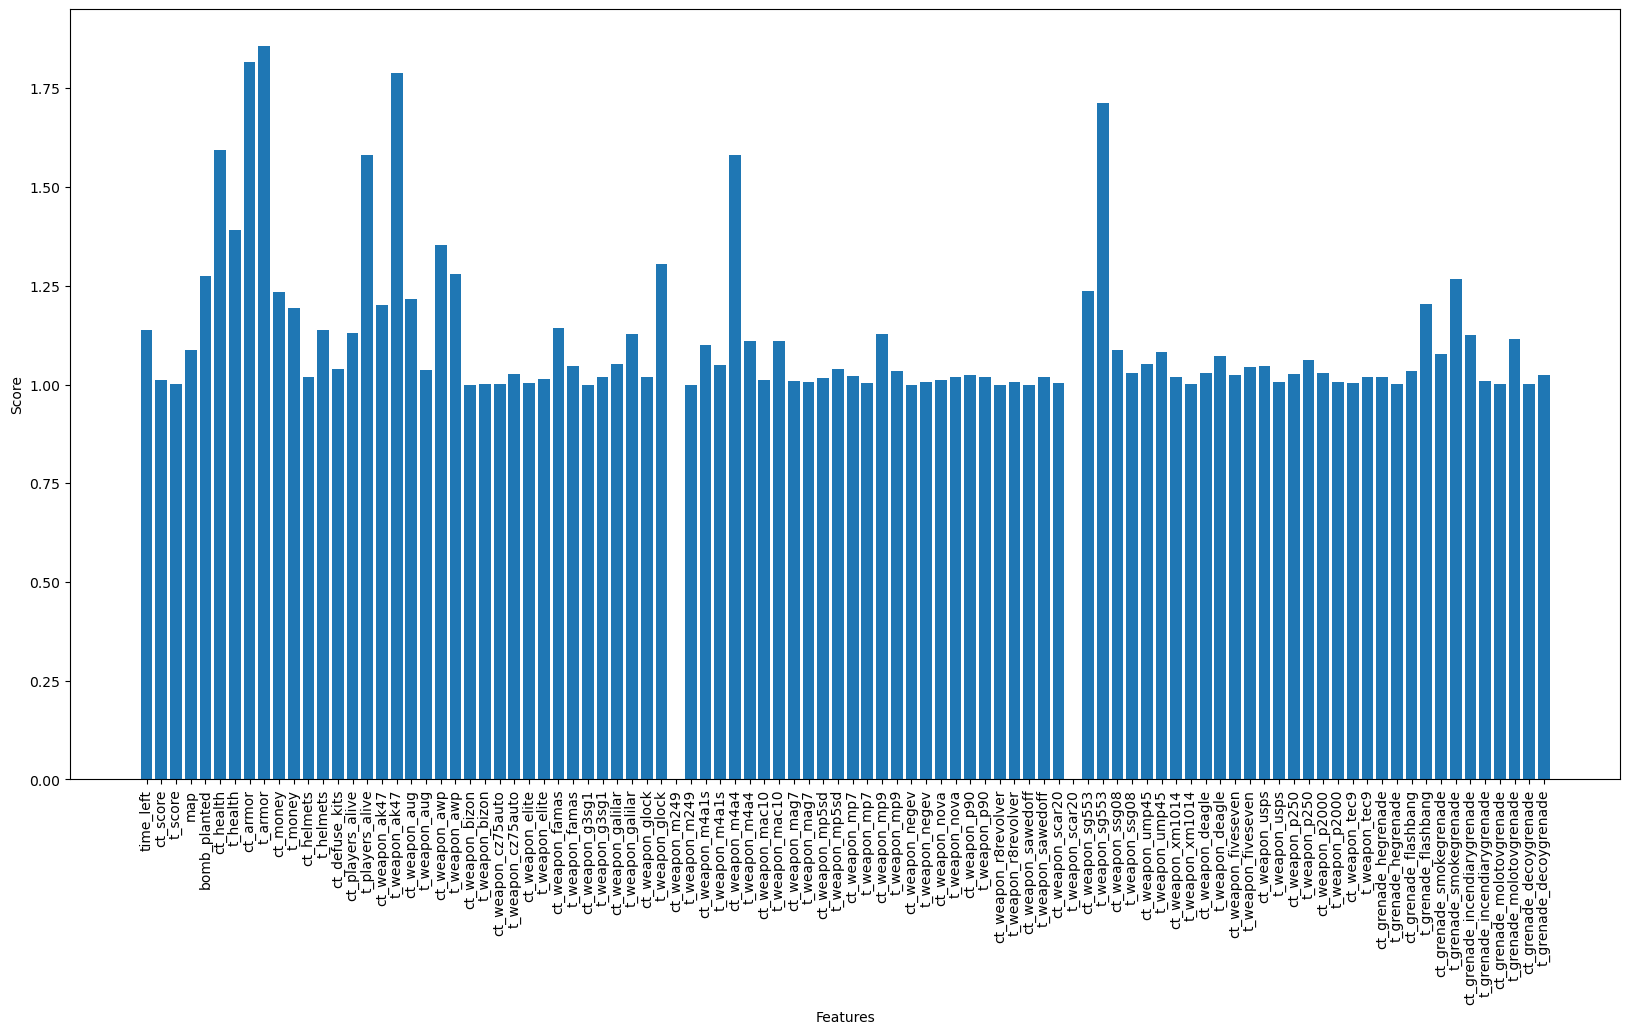

In [71]:
plt.figure(figsize=(20,10))
plt.bar(feature_names,lda_coeff)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

In [72]:
df_feature_score = pd.DataFrame({"Feature_names":feature_names,"feature_scores":lda_coeff})

In [73]:
df_feature_score

,Feature_names,feature_scores
0,time_left,1.137134
1,ct_score,1.011540
2,t_score,1.002507
3,map,1.088648
4,bomb_planted,1.273814
...,...,...
91,t_grenade_incendiarygrenade,1.010069
92,ct_grenade_molotovgrenade,1.000431
93,t_grenade_molotovgrenade,1.116579
94,ct_grenade_decoygrenade,1.001522


In [33]:
top_20_values = df_feature_score.nlargest(20,"feature_scores")

In [34]:
top_20_values

,Feature_names,feature_scores
36,ct_weapon_m249,inf
63,t_weapon_scar20,inf
8,t_armor,1.856981
7,ct_armor,1.815851
17,t_weapon_ak47,1.788869
65,t_weapon_sg553,1.713031
5,ct_health,1.593715
15,t_players_alive,1.582531
40,ct_weapon_m4a4,1.580200
6,t_health,1.390617


In [35]:
imp_col=top_20_values.index

In [36]:
imp_col

Index([36, 63, 8, 7, 17, 65, 5, 15, 40, 6, 20, 35, 21, 4, 89, 64, 9, 18, 87,
       16],
      dtype='int64')

In [37]:
x_train= x_train[:,imp_col]

In [38]:
x_test= x_test[:,imp_col]

In [39]:
x_train=pd.DataFrame(x_train)

In [40]:
x_test=pd.DataFrame(x_test)

In [41]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.002918,-0.002918,-0.054919,-0.168787,-0.940986,1.869350,-1.035043,-0.992892,0.726451,-0.740199,-0.876780,-0.159325,-0.690560,-0.363148,-0.366084,-0.439628,-0.884340,-0.297517,0.612828,-0.479267
1,-0.002918,-0.002918,1.105215,0.999471,-0.940986,-0.742782,0.683520,0.614080,-0.908866,0.631865,-0.876780,-1.384317,-0.690560,-0.363148,-0.366084,-0.439628,-0.787069,1.847135,-1.051011,-0.479267
2,-0.002918,-0.002918,0.054203,0.482854,1.984910,-0.742782,0.683520,0.614080,1.544110,-0.528024,2.081069,-0.771821,1.388414,-0.363148,1.268759,-0.439628,-0.844547,-0.297517,1.167441,-0.479267
3,-0.002918,-0.002918,1.133931,1.058177,0.521962,0.998639,0.683520,0.614080,0.726451,0.716735,2.081069,0.453172,1.388414,-0.363148,1.813707,1.343355,-0.428938,-0.297517,1.722054,-0.479267
4,-0.002918,-0.002918,1.133931,1.022954,2.716384,-0.742782,0.683520,0.614080,1.544110,0.716735,0.602145,0.453172,-0.690560,-0.363148,1.813707,-0.439628,-0.415674,-0.297517,1.722054,-0.479267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82208,-0.002918,-0.002918,-0.014716,-0.104210,-0.940986,-0.742782,0.683520,0.614080,-0.908866,0.716735,-0.876780,1.065668,-0.690560,-0.363148,-0.911032,-0.439628,-0.773805,-0.297517,-1.051011,-0.479267
82209,-0.002918,-0.002918,1.087985,0.482854,-0.209512,1.869350,-0.063681,0.614080,-0.091208,0.575285,0.602145,1.065668,1.388414,-0.363148,1.268759,1.343355,-0.367039,1.847135,1.722054,-0.479267
82210,-0.002918,-0.002918,1.053526,-1.865404,-0.209512,2.740060,0.683520,0.614080,-0.908866,0.716735,-0.876780,-0.159325,-0.690560,-0.363148,1.813707,-0.439628,0.203318,-0.297517,1.722054,-0.479267
82211,-0.002918,-0.002918,1.047783,1.069919,-0.209512,0.998639,0.683520,0.614080,-0.091208,0.716735,0.602145,1.065668,1.388414,-0.363148,1.813707,3.126338,-0.300719,-0.297517,1.722054,1.210990


In [42]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.002918,-0.002918,1.133931,1.069919,1.253436,0.998639,0.683520,0.614080,-0.908866,0.716735,2.081069,0.453172,-0.690560,-0.363148,1.813707,-0.439628,3.254064,-0.297517,1.722054,-0.479267
1,-0.002918,-0.002918,1.133931,1.069919,1.984910,-0.742782,0.683520,0.614080,-0.091208,0.716735,2.081069,1.065668,1.388414,-0.363148,1.813707,-0.439628,3.483975,3.991788,1.722054,-0.479267
2,-0.002918,-0.002918,-0.744107,-0.691275,-0.940986,-0.742782,-1.558084,-0.992892,-0.908866,-1.023099,-0.876780,-0.159325,-0.690560,-0.363148,-0.911032,-0.439628,-0.804755,-0.297517,-1.051011,-0.479267
3,-0.002918,-0.002918,-1.163363,-1.337046,-0.209512,-0.742782,-2.006405,-2.599864,-0.908866,-2.119335,0.602145,-1.384317,-0.690560,2.753701,-0.911032,-0.439628,-0.800333,-0.297517,-1.051011,-0.479267
4,-0.002918,-0.002918,0.605554,0.770516,-0.940986,2.740060,0.683520,0.614080,1.544110,0.716735,2.081069,-0.159325,1.388414,-0.363148,1.813707,-0.439628,-0.313983,-0.297517,1.722054,-0.479267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35230,-0.002918,-0.002918,-1.737687,0.899670,-0.940986,-0.742782,0.683520,-0.992892,0.726451,-0.747271,0.602145,-1.384317,-0.690560,-0.363148,-0.911032,-0.439628,-0.676535,-0.297517,-1.051011,2.901246
35231,-0.002918,-0.002918,1.065012,1.069919,0.521962,-0.742782,0.683520,0.614080,1.544110,0.716735,0.602145,-0.159325,-0.690560,-0.363148,1.268759,-0.439628,-0.853390,-0.297517,1.167441,-0.479267
35232,-0.002918,-0.002918,-0.141067,-1.325304,-0.940986,1.869350,-2.305286,-0.992892,-0.908866,-1.291853,-0.876780,-0.159325,-0.690560,2.753701,-0.911032,-0.439628,-0.176920,-0.297517,0.058215,1.210990
35233,-0.002918,-0.002918,-1.238025,-1.360528,-0.940986,-0.742782,-2.514502,-1.796378,-0.908866,-1.560608,-0.876780,-1.996814,-0.690560,2.753701,-0.911032,-0.439628,-0.818019,-0.297517,-1.051011,-0.479267


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred)

0.7563502199517526

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_dt_pred = dt.predict(x_test)

In [48]:
accuracy_score(y_test,y_dt_pred)

0.7918546899389811

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_rf_pred = rf.predict(x_test)

In [51]:
accuracy_score(y_test,y_rf_pred)

0.8392507449978714